# Code for "Simple Model" of W based on idealized forcing parameter F 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from firedrake import *

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


## Goal: Solve our simple model for values of w  
### Simple model is given as :   
$\frac{\beta^2 L^4 H}{4R} \frac{\partial^2 w}{\partial z^2} + S_0 w = \mathcal{Q} - \partial_z \mathcal{F}$   

### Idealized Forcing term is given as: 
$\mathcal{F}$ ($\theta$, z, t) = $f$  exp(-$\frac{\theta^2}{2\Delta\theta^2}$) exp(-$\frac{(z - z_0)^2}{2 \Delta z^2}$) - cos(mz - wt)      

such that u ($\theta$, z, t) =$\frac{\mathcal{F}}{\omega}$  


### S0 is given as :   
$S_0 = \partial_z T_0 + \frac{g}{c_p}$   
with $\partial_z T_0 = -0.0225z^2+1.44z-19.6$ take from ERA 5 output (valid from 5-50 km) 

### The full equation then becomes : 

$\frac{(\frac{2\omega_{e} cos(\phi)}{a})^2 L^4 H}{4R} \frac{\partial^2 w}{\partial z^2} + \left(-0.0225z^2+1.44z-19.6\right)w+\frac{g}{C_p} w = -F \exp\left(-\frac{\phi^2}{2 \Delta \phi^2}-\frac{(z - z_0)^2}{2 \Delta z^2}\right)... \\
    \left( \frac{-z+z_0}{\Delta z^2}\cos(mz-\omega t) - m \sin(mz- \omega t) \right)$

# Constants and Units (dimensional analysis) 

Setup such that t (time) is in seconds   

Our constants are given as follows (all are converted to radian, m, s, k and kg when processed):   
a=$6.37\cdot10^6  m$  
$\omega_e=7.29\cdot 10^{-5} rad \cdot s^{-1}$  
$L= 1100 km$  
$H=7 km$   
$R=287 J\cdot kg^{-1}\cdot K^{-1}$  
$g= 9.81 m s^{-2}$   
$C_p=1.005 KJ kg^{-1} K^{-1}$  
F=0.1  m $s^{-1} day^{-1}$  
$\Delta \phi= 10 degrees$     
$z0=30 km    $  
$\Delta z=6 km$     
$m$=$\frac{2pi}{25}$ $km^{-1}$     
$\omega=\frac{2\pi}{840} days^{-1}$  

Boundary Conditions: Dirichlet
$w(z_0)=0$
$w(z_{50})=0$ 

# User Specifications Idealized Forcing Calculation 

In [2]:
#select time frame to iterate over 
t = 0 #seconds 
tt = 840*5*3600*24 #seconds 
dt = 10*3600*24 #seconds 
tvec = np.arange(t,tt,dt)

#select latitude to iterate over 
lat=-20
latt=21
dlat=1
latvec = np.arange(lat,latt,dlat)

p=5000   # m 
pp=50000+450 #m 
dp=450
pvec = np.arange(p,pp,dp)

Py,Latx,Tz=np.meshgrid(pvec,latvec, tvec)

# Saving matrix for F (idealized wave forcing)
F=np.zeros(np.shape(Py))
U=np.zeros(np.shape(Py))

In [3]:
#setup constants : 
dtheta=(10*np.pi)/180 # radians latitude 
f=0.1/24/3600 # m s-1 s-1 
dz=6*1000# m 
z0=30*1000 # m 
m=(2*np.pi)/(25*1000) #m -1 
T=840*3600*24 # days - cycle time for QBO  this is a constant 
omega=(np.pi*2)/T # per second [s-1] - this is a constant 
theta=(Latx*np.pi)/180 #convert to radians

for k in np.arange(0,len(tvec)):  
    for i in np.arange(0,len(latvec)): 
        for j in np.arange(0,len(pvec)):  
            F[i,j,k]=f*np.exp(-1*theta[i,j,k]**2/(2*dtheta**2))*np.exp(-1*(Py[i,j,k]-z0)**2/(2*dz**2))*np.cos((m*Py[i,j,k]-omega*Tz[i,j,k]))
            U[i,j,k]=F[i,j,k]/omega 
 

# Generate Plots of Idealized Forcing (m/s)

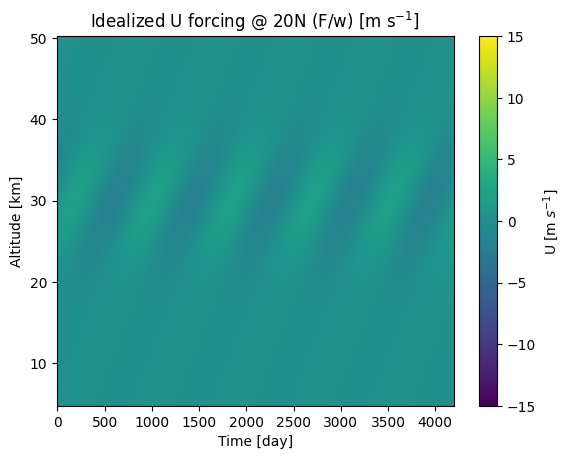

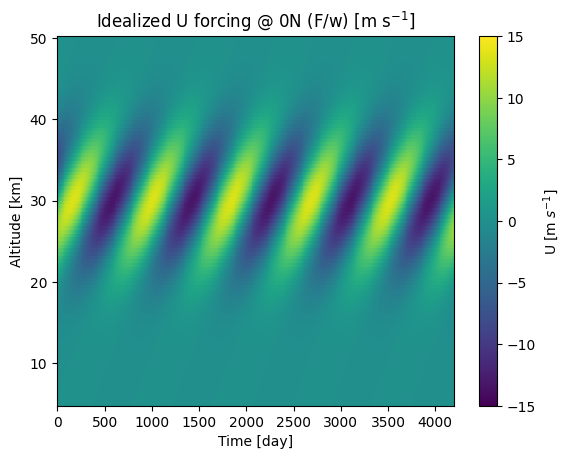

In [13]:
plt_path='/Users/colleen/Documents/Working Papers/ISSI QBO/plots/'
# Forcing vs. time @ 20 N 
plt.figure()
plt.pcolormesh(Tz[40,:,:]/3600/24,Py[40,:,:]/1000, U[40,:,:],vmin=-15, vmax=15)
plt.xlabel('Time [day]')
plt.ylabel('Altitude [km]')
plt.title('Idealized U forcing @ 20N (F/w) [m s$^{-1}$]')
plt.colorbar(label='U [m $s^{-1}$]')
plt.savefig(plt_path+'forcing_20N.pdf', bbox_inches='tight')

plt.figure()
# Forcing vs. time @ 0 
plt.pcolormesh(Tz[20,:,:]/3600/24,Py[20,:,:]/1000, U[20,:,:],vmin=-15, vmax=15)
plt.xlabel('Time [day]')
plt.ylabel('Altitude [km]')
plt.title('Idealized U forcing @ 0N (F/w) [m s$^{-1}$]')
plt.colorbar(label='U [m $s^{-1}$]')
plt.savefig(plt_path+'forcing_0N.pdf', bbox_inches='tight')

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
/var/folders/yr/hfdz5pd90959dh16j98glswr0000gn/T/ipykernel_96333/2949384764.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Idealized forcing @ phase=$\pi$/2 [m s$^{-1}$]')
/var/folders/yr/hfdz5pd90959dh16j98glswr0000gn/T/ipykernel_96333/2949384764.py:16: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Idealized forcing @ phase= $\pi$ [m s$^{-1}$]')
/var/folders/yr/hfdz5pd90959dh16j98glswr0000gn/T/ipykernel_96333/2949384764.py:26: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Idealized forcing @ phase =3 $\pi$ /2 [m s$^{-1}$]')
/var/folders/yr/hfdz5pd90

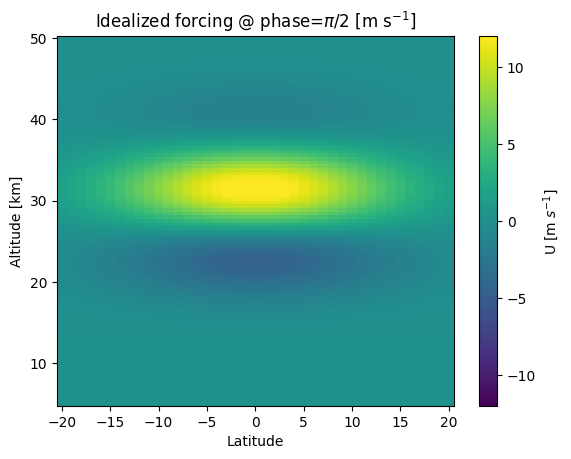

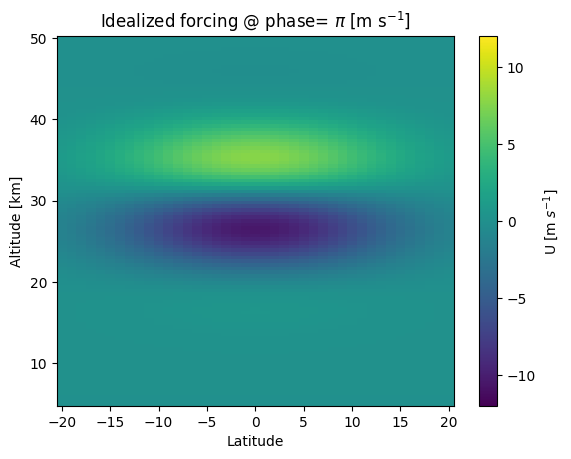

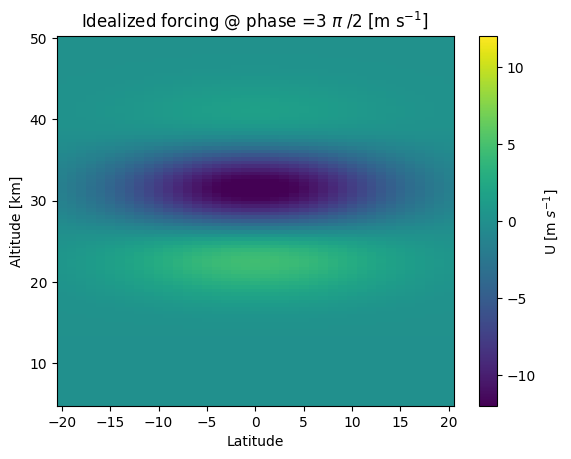

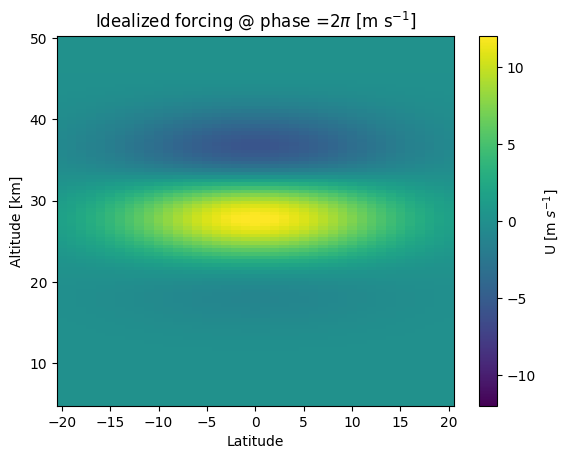

In [19]:
plt_path ='/Users/colleen/Documents/Working Papers/ISSI QBO/plots/'
# forcing at 1/4 cycle 
plt.figure()
plt.pcolormesh(Latx[:,:,24],Py[:,:,24]/1000, U[:,:,24], vmin=-12, vmax=12)
plt.xlabel('Latitude')
plt.ylabel('Altitude [km]')
plt.title('Idealized forcing @ phase=$\pi$/2 [m s$^{-1}$]')
plt.colorbar(label='U [m $s^{-1}$]')
plt.savefig(plt_path+'forcing_lat_a.pdf', bbox_inches='tight')

#forcing at 1/2 cycle 
plt.figure()
plt.pcolormesh(Latx[:,:,42],Py[:,:,42]/1000, U[:,:,42],vmin=-12, vmax=12)
plt.xlabel('Latitude')
plt.ylabel('Altitude [km]')
plt.title('Idealized forcing @ phase= $\pi$ [m s$^{-1}$]')
plt.colorbar(label='U [m $s^{-1}$]')
plt.savefig(plt_path+'forcing_lat_b.pdf', bbox_inches='tight')


#forcing at 3/4 cycle 
plt.figure()
plt.pcolormesh(Latx[:,:,42+24],Py[:,:,42+24]/1000, U[:,:,42+24],vmin=-12, vmax=12)
plt.xlabel('Latitude')
plt.ylabel('Altitude [km]')
plt.title('Idealized forcing @ phase =3 $\pi$ /2 [m s$^{-1}$]')
plt.colorbar(label='U [m $s^{-1}$]')
plt.savefig(plt_path+'forcing_lat_c.pdf', bbox_inches='tight')


#forcing at 3/4 cycle 
plt.figure()
plt.pcolormesh(Latx[:,:,42+24+24],Py[:,:,42+24+24]/1000, U[:,:,42+24+24],vmin=-12, vmax=12)
plt.xlabel('Latitude')
plt.ylabel('Altitude [km]')
plt.title('Idealized forcing @ phase =2$\pi$ [m s$^{-1}$]')
plt.colorbar(label='U [m $s^{-1}$]')
plt.savefig(plt_path+'forcing_lat_d.pdf', bbox_inches='tight')




# Given this forcing function we now solve our firedrake simulation with the same spatiotemporal bounds 

In [42]:
# Let's take t and lat outside the solver loop and see what happens 
t=0
dt=10*3600*24 #s 
tt=840*5*3600*24 #s 

#the forcing at each time is the same at all latitudes so don't bother looping over lat. 

time_size = np.shape(np.arange(t,tt,dt))[0]
solution_mat=np.zeros([101,time_size])
timecount=0
while t<tt:
    lat=0
    # define your firedrake variables 
    theta = firedrake.Constant((lat*np.pi)/180) #radians
    dtheta=firedrake.Constant((10*np.pi)/180) #radians
    f=firedrake.Constant(0.1/24/3600) # m s-1 s-1
    dz=firedrake.Constant(6000) # m 
    z0=firedrake.Constant(30000) # m 
    m=firedrake.Constant((2*np.pi)/25000) #m -1 
    omega_t=firedrake.Constant((np.pi*2)/(840*3600*24)*t) # s s-1
    We=firedrake.Constant(7.29*10**(-5)) # rad s-1
    R= firedrake.Constant(287) # J/(kg K)
    g=firedrake.Constant(9.81) #m/s2
    Cp=firedrake.Constant(1005) # J/(kg K)
    H=firedrake.Constant(7000) #  m
    L=firedrake.Constant(1100*1000) # m 
    aa=firedrake.Constant(6.37*10**6) # m average radius of earth 
    
    # setup firedrake parameters 
    N = 100 # number of elements
    mesh = IntervalMesh(N, 5000, 50000) #solving in function space z = 5 to 50 km 

    V = FunctionSpace(mesh,'CG', 1) # Define Function space as "continuous Galerkin" "Lagrange" or "CG", representing standard scalar
    #Lagrange finite elements (continuous piecewise polynomial functions);

    u = TrialFunction(V) # trial function 
    v = TestFunction(V) # test function 
    z = SpatialCoordinate(mesh)[0]

    # Define LHS : 
    a = -((2*cos(theta)*We/aa)**2*(L**4)*H/(4*R))*inner(grad(u), grad(v))*dx + (-0.0225*z**2+1.44*z-19.6+g/Cp)*u*v*dx 
    # Define RHS : 
    l=(-f*exp((-theta**2/(2*dtheta**2))-((z-z0)**2/(2*(dz**2))))*(-z+z0/(dz**2))*cos(m*z-omega_t)-m*sin(m*z-omega_t))*v*dx
    s=Function(V)

    bcs =  [DirichletBC(V, Constant(0), 1),
            DirichletBC(V, Constant(0), 2)]

    
    solve(a==l, s, bcs=bcs)
        
    #extract the result at a given point evaluation and save into an array 
    solution_mat[:,timecount]=s.dat.data

    t =t+dt
    timecount=timecount+1

# wbar star should be on the order of x10-5 m/s ish 

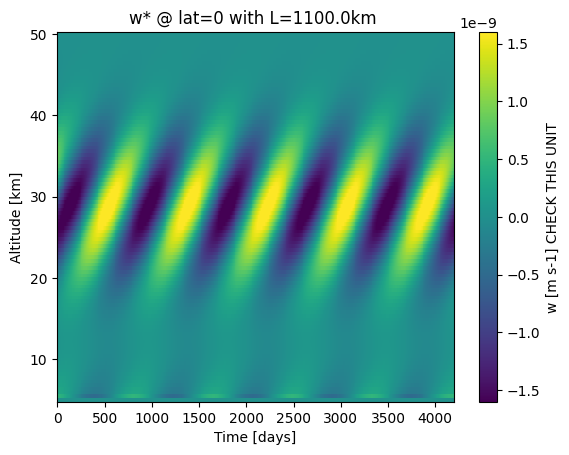

In [43]:
######################  Generate Plot ###########################
# plot of wbar for given forcing and L=1 
rows = mesh.coordinates.dat.data # zcoord 
t=0
columns =np.arange(t,tt,dt) #time coord 
timemesh,zmesh=np.meshgrid(columns,rows)

plt.figure()
plt.pcolormesh(timemesh/3600/24,zmesh/1000,solution_mat, vmin=-1.6*10**(-9), vmax=1.6*10**(-9))
plt.title('w* @ lat=' +str(lat)+ ' with L='+str(L.dat.data[0]/1000)+ 'km ')
plt.ylabel('Altitude [km]')
plt.xlabel('Time [days]')
plt.colorbar(label='w [m s-1] CHECK THIS UNIT')
plt.savefig(plt_path+'w_solution_lat'+str(lat)+'.pdf', bbox_inches='tight')
